Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data                                  
Dataset - https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma                              
This is the Dataset You can use this dataset for this question.                                            

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [5]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [6]:
# Feature Engineering
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:title={'center':'Day'}, xlabel='hour', ylabel='count'>

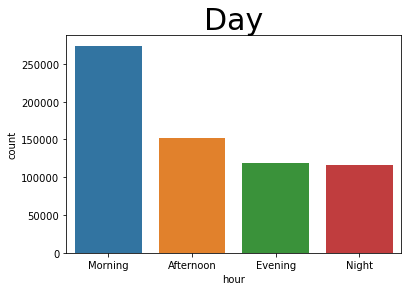

In [7]:
#Number of rides during the parts of the day
day=pd.cut(x=df['hour'],bins=[0,10,15,19,23],labels = ['Morning','Afternoon','Evening','Night'])
plt.title('Day',fontsize=30)
sns.countplot(x=day)

<AxesSubplot:title={'center':'Price'}, xlabel='price', ylabel='Count'>

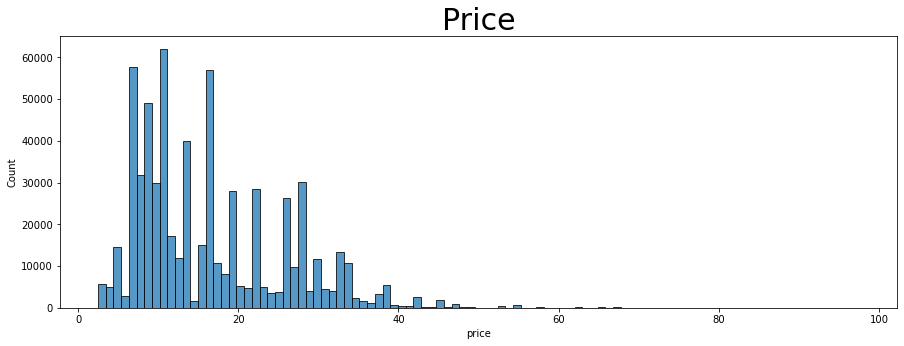

In [8]:
#show distribution of price
bins = np.linspace(df['price'].min(),df['price'].max(),100)
count=df['price'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Price',fontsize=30)
sns.histplot(x='price',data=df,bins=bins)

([<matplotlib.patches.Wedge at 0x2721c17d130>,
 [Text(0.6015157448084366, 0.9209662364861981, ' cloudy '),
  Text(-0.9948399663550234, 0.4693542812660137, ' partly-cloudy-night '),
  Text(-0.7674714304666892, -0.7880276666573415, ' partly-cloudy-day '),
  Text(0.24527090627403705, -1.07230694417947, ' rain '),
  Text(0.9086814945303708, -0.6199176892927414, ' clear-night '),
  Text(1.0772436797481468, -0.22258943021327895, ' clear-day '),
  Text(1.0990725230980083, -0.045161808765570174, ' fog ')],
 [Text(0.3280994971682381, 0.5023452199015626, '31.583%'),
  Text(-0.5426399816481945, 0.25601142614509836, '22.801%'),
  Text(-0.4186207802545577, -0.4298332727221862, '16.651%'),
  Text(0.13378413069492928, -0.5848946968251653, '15.086%'),
  Text(0.4956444515620204, -0.3381369214324043, '8.700%'),
  Text(0.5875874616808073, -0.12141241647997032, '3.871%'),
  Text(0.5994941035080045, -0.024633713872129186, '1.307%')])

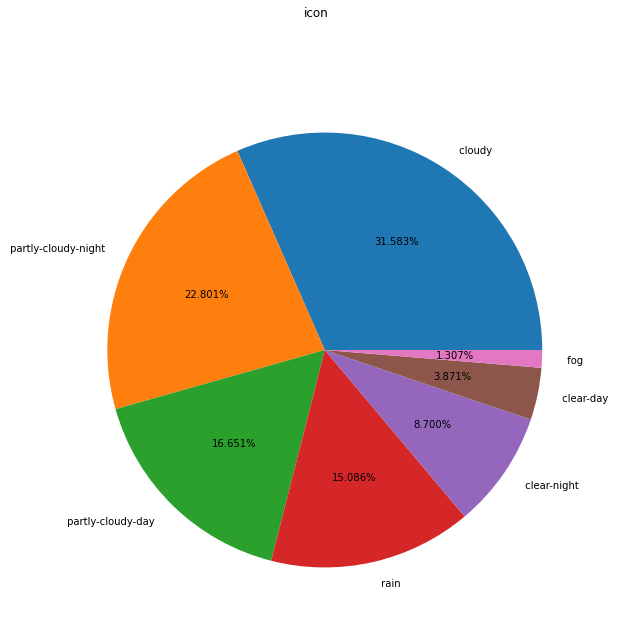

In [9]:
#show number of icon 
plt.figure(figsize=(10,10))
plt.suptitle('icon')
plt.pie(df['icon'].value_counts(),labels=list(df['icon'].value_counts().index),autopct ='%1.3f%%')

**Data Transformation**

In [10]:
#filling nan values
df["price"].fillna(df['price'].median(), inplace = True) 

In [11]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [12]:
# label encoding
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [13]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [14]:
df['id']= label_encoder.fit_transform(df['id']) 
df['datetime']= label_encoder.fit_transform(df['datetime']) 
df['timezone']= label_encoder.fit_transform(df['timezone'])
df['cab_type']= label_encoder.fit_transform(df['cab_type'])
df['destination']= label_encoder.fit_transform(df['destination']) 
df['product_id']= label_encoder.fit_transform(df['product_id'])
df['short_summary']= label_encoder.fit_transform(df['short_summary'])
df['long_summary']= label_encoder.fit_transform(df['long_summary'])
df['name']= label_encoder.fit_transform(df['name'])
df['source']= label_encoder.fit_transform(df['source'])
df['icon']= label_encoder.fit_transform(df['icon'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  int32  
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  int32  
 6   timezone                     693071 non-null  int32  
 7   source                       693071 non-null  int32  
 8   destination                  693071 non-null  int32  
 9   cab_type                     693071 non-null  int32  
 10  product_id                   693071 non-null  int32  
 11  name                         693071 non-null  int32  
 12  price                        693071 non-null  float64
 13 

**Model Building**

In [16]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import folium

In [17]:
#Unsupervised algorithm - K-Means clustering for high booking areas:
# Select the relevant features for clustering
cluster_features = df.drop('price', axis=1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_features)

# Add the cluster labels to the dataset
df['cluster'] = kmeans.labels_

In [18]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cluster
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,1
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,0
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,4
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,263466,1.543708e+09,23,1,12,11456,0,11,6,1,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,4
693067,268325,1.543708e+09,23,1,12,11456,0,11,6,1,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,4
693068,272709,1.543708e+09,23,1,12,11456,0,11,6,1,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,4
693069,309823,1.543708e+09,23,1,12,11456,0,11,6,1,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,4


In [19]:
# Split the dataset into training and testing sets
X = df.drop(['price', 'cluster'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.5256157708384666

In [21]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(X_train , y_train) 
decision.score(X_test, y_test)

0.9336415770954318